In [26]:
# if you don't have this, install with
# pip install textblob
import textblob
import pandas as pd
# next line will show plots without calling plt.show()
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
filepath = 'C:\\Users\\ngeorge\\Documents\\GitHub\\MSDS650-students\\assignments\\'
df = pd.read_excel(filepath + 'trumptastic_hildog_tweets.xlsx')

In [6]:
df.head()

,handle,text
0,HillaryClinton,The question in this election: Who can put the...
1,HillaryClinton,"Last night, Donald Trump said not paying taxes..."
2,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...
3,HillaryClinton,"If we stand together, there's nothing we can't..."
4,HillaryClinton,Both candidates were asked about how they'd co...


In [40]:
df['handle'].value_counts()

HillaryClinton     3226
realDonaldTrump    3218
Name: handle, dtype: int64

In [10]:
test = df.iloc[0]['text']
test

'The question in this election: Who can put the plans into action that will make your life better? https://t.co/XreEY9OicG'

In [11]:
tb = textblob.TextBlob(test)

In [12]:
tb.polarity

0.3

In [13]:
def classify_sentiment(tweet):
    tb = textblob.TextBlob(tweet)
    return tb.polarity

In [14]:
df['polarity'] = df['text'].apply(lambda x: classify_sentiment(x))

In [36]:
for i, r in df.iterrows():
    print(r['polarity'], r['handle'])
    print(r['text'])
    print() # blank line
    # stops the loop at 20 iterations
    if i == 19:
        break

0.3 HillaryClinton
The question in this election: Who can put the plans into action that will make your life better? https://t.co/XreEY9OicG

0.10714285714285714 HillaryClinton
Last night, Donald Trump said not paying taxes was "smart." You know what I call it? Unpatriotic. https://t.co/t0xmBfj7zF

0.3 HillaryClinton
Couldn't be more proud of @HillaryClinton. Her vision and command during last night's debate showed that she's ready to be our next @POTUS.

0.35 HillaryClinton
If we stand together, there's nothing we can't do. 

Make sure you're ready to vote: https://t.co/tTgeqxNqYm https://t.co/Q3Ymbb7UNy

0.1 HillaryClinton
Both candidates were asked about how they'd confront racial injustice. Only one had a real answer. https://t.co/sjnEokckis

-0.125 realDonaldTrump
Join me for a 3pm rally - tomorrow at the Mid-America Center in Council Bluffs, Iowa! Tickets:… https://t.co/dfzsbICiXc

0.45 HillaryClinton
This election is too important to sit out. Go to https://t.co/tTgeqxNqYm and ma

In [38]:
# look at the top 10 most negative tweets
for i, r in df.sort_values(by='polarity').reset_index().iterrows():
    print(r['polarity'], r['handle'])
    print(r['text'])
    print() # blank line
    # stops the loop at 20 iterations
    if i == 9:
        break

-1.0 realDonaldTrump
I was viciously attacked by Mr. Khan at the Democratic Convention. Am I not allowed to respond? Hillary voted for the Iraq war, not me!

-1.0 realDonaldTrump
We just had the worst jobs report since 2010.

-1.0 realDonaldTrump
Pathetic attempt by @foxnews to try and build up ratings for the #GOPDebate. Without me they'd have no ratings! 
https://t.co/2bx54VKpQh

-1.0 HillaryClinton
Putting Donald Trump in charge of our economy would be devastating for working families.
https://t.co/HP7grLtUIB

-1.0 HillaryClinton
Mike Pence’s governorship has been devastating to Indiana women. Just ask one of them: https://t.co/nu0DSiPQNf

-1.0 realDonaldTrump
"@chgardens1: @mitchellvii Pathetic attempt to bribe @realDonaldTrump He can't be bought"

-1.0 realDonaldTrump
We will repeal and replace the horrible disaster known as #Obamacare! https://t.co/YzRTPrqrNC

-1.0 realDonaldTrump
How quality a woman is Rowanne Brewer Lane to have exposed the @nytimes as a disgusting fraud?  Than

In [39]:
# look at the top 10 most positive tweets
for i, r in df.sort_values(by='polarity', ascending=False).reset_index().iterrows():
    print(r['polarity'], r['handle'])
    print(r['text'])
    print() # blank line
    # stops the loop at 20 iterations
    if i == 9:
        break

1.0 HillaryClinton
"She is still the best darn changemaker I have ever known.” —@BillClinton on Hillary

1.0 realDonaldTrump
Thank you for your support! TOGETHER we will MAKE AMERICA GREAT AGAIN! 
https://t.co/fFN9pisyQ4 https://t.co/VxyuDwZmC9

1.0 realDonaldTrump
MAKE AMERICA GREAT AGAIN! https://t.co/IVSR0hmh5g

1.0 realDonaldTrump
Thank you for the incredible support- Melania, Barron, Ivanka, Jared, Tiffany, Don, Vanessa, Eric, and Lara!
https://t.co/mPGpPFiDl8

1.0 HillaryClinton
"It was the greatest moment of my life...and the...conviction that my daughter had the best mother in the world” —Bill on Chelsea being born

1.0 realDonaldTrump
Great job once again by law enforcement! We are proud of them and should embrace them - without them, we don't have a country!

1.0 realDonaldTrump
Great poll! Thank you North Carolina! 
#VoteTrumpNC on 3/15!
Trump 36%
Cruz 18%
Rubio 18%
Carson 10%
Kasich 7%
Via @SurveyUSA

1.0 realDonaldTrump
Thank you Illinois! Great news! #VoteTrumpIL on 3/15!

In [32]:
candidates = df.groupby('handle')
candidates.mean()

,polarity
handle,
HillaryClinton,0.115394
realDonaldTrump,0.146275


In [33]:
candidates = list(candidates)

In [22]:
candidates[0][0]

'HillaryClinton'

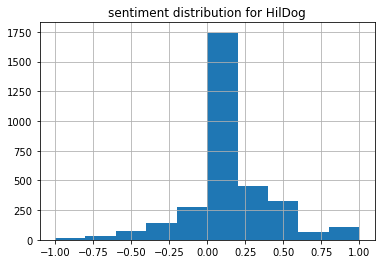

In [28]:
f = candidates[0][1]['polarity'].hist()
t = plt.title('sentiment distribution for HilDog')

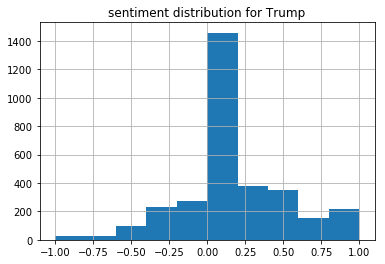

In [30]:
f = candidates[1][1]['polarity'].hist()
t = plt.title('sentiment distribution for Trump')

## Pros:
* orders of magnitude faster than Aylien and Rapidminer
* continuous distribution of sentiment rather than just negative, neutral, positive
* unlimited number of classifications
* could train our own sentiment classifier

## Cons:
* not as easy to learn
* classification perhaps seems not as accurate as Aylien
* would take extra effort to train our own classifier to get higher accuracy

In [45]:
# now this will compare aylien's polarity with textblob
# I saved the Aylien analysis from rapidminer
df_a = pd.read_excel(filepath + 'trump_hil_tweet_sample_30each_polarity.xlsx')
df_a.head()

,text,handle,polarity,subjectivity,polarity_confidence,subjectivity_confidence
0,"When we stand together - as white, black and h...",HillaryClinton,negative,subjective,0.575071,1.000000
1,“We have to face the world as it is but commit...,HillaryClinton,neutral,subjective,0.529633,1.000000
2,Immigrants aren’t somehow changing the America...,HillaryClinton,neutral,objective,0.947658,0.997346
3,I will be interviewed on @foxandfriends tomorr...,realDonaldTrump,positive,subjective,0.927834,1.000000
4,Imagine this man in charge of our men and wome...,HillaryClinton,neutral,objective,0.972369,0.998919


In [46]:
df_a['tb_polarity'] = df_a['text'].apply(lambda x: classify_sentiment(x))

In [47]:
def round_polarity(pol):
    """
    Takes a polarity in the range of [-1, 1], and classifies it as negative, neutral, or positive.
    """
    if pol > 0:
        return 'positive'
    elif pol < 0:
        return 'negative'
    else:
        return 'neutral'

In [48]:
df_a['tb_polarity_round'] = df_a['tb_polarity'].apply(lambda x: round_polarity(x))

In [49]:
df_a.head()

,text,handle,polarity,subjectivity,polarity_confidence,subjectivity_confidence,tb_polarity,tb_polarity_round
0,"When we stand together - as white, black and h...",HillaryClinton,negative,subjective,0.575071,1.000000,-0.07,negative
1,“We have to face the world as it is but commit...,HillaryClinton,neutral,subjective,0.529633,1.000000,0.00,neutral
2,Immigrants aren’t somehow changing the America...,HillaryClinton,neutral,objective,0.947658,0.997346,0.00,neutral
3,I will be interviewed on @foxandfriends tomorr...,realDonaldTrump,positive,subjective,0.927834,1.000000,0.50,positive
4,Imagine this man in charge of our men and wome...,HillaryClinton,neutral,objective,0.972369,0.998919,0.00,neutral


In [53]:
mismatched = df_a[df_a['polarity'] != df_a['tb_polarity_round']]

In [54]:
# half of the entries didn't match
mismatched.shape

(31, 8)

In [56]:
mismatched['polarity'].value_counts()

neutral     19
negative     9
positive     3
Name: polarity, dtype: int64

In [64]:
# this allows us to print more of the 'text' strings
pd.options.display.max_colwidth = 150

In [65]:
mismatched[['polarity', 'tb_polarity', 'tb_polarity_round', 'text']]

,polarity,tb_polarity,tb_polarity_round,text
5,neutral,0.325000,positive,Did Trump use his charitable foundation to prevent a state attorney general from investigating his fraud? https://t.co/MZdZDzimY4
6,neutral,0.345238,positive,There's a reason the most hateful fringe of the right wing is supporting Donald Trump.\r\nhttps://t.co/AqB3DM2m0N
8,negative,0.250000,positive,We now have confirmation as to one reason Crooked H wanted to be sure that nobody saw her e-mails - PAY-FOR-PLAY. How can she run for Pres.
10,negative,0.000000,neutral,"No such meeting or conversation ever happened - a made up story by ""low ratings"" @CNN."
11,neutral,0.500000,positive,22 memorable moments from the Democratic Convention that you probably missed: https://t.co/xnvFiEKlJC https://t.co/bLqoDfFfvc
12,neutral,-0.333333,negative,"No, this seriously happened... https://t.co/kAptsQAWR1"
13,positive,0.000000,neutral,Thank you Oklahoma &amp; Virginia! \r\n#MakeAmericaGreatAgain #ImWithYou https://t.co/WUdY7feRvV
14,negative,0.000000,neutral,"Every generation of Americans has come together to make our country freer, fairer, and stronger. None of us…can do it alone.” —Hillary"
16,neutral,0.433333,positive,"""Bill, that conversation we started in the law library 45 years ago, it is still going strong.” —Hillary"
17,negative,0.000000,neutral,"""She always feels like there isn’t a moment to lose because she knows that for that mother, for that family, there isn’t.” —@ChelseaClinton"


## So we can see many of the mismatches are troubling.  Ideally we'd train our own sentiment classifier on a large dataset, like [this one](http://ai.stanford.edu/~amaas/data/sentiment/).